In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\User\Downloads\ARM Dataset.xlsx')

In [3]:
df.head()

,State,EPA.Region,County,FIPS,Tract,Population,Pollutant.Name,Point..includes.railyards..Conc,Airport.Conc,OR.Lightduty..includes.refueling..Conc,...,Total.Kidney.HI,Total.Ocular.HI,Total.Endocrine.HI,Total.Hematological.HI,Total.Immunological.HI,Total.Skeletal.HI,Total.Spleen.HI,Total.Thyroid.HI,Total.Wholebody.HI,Chemical.Name
0,AK,EPA Region 10,Aleutians East Borough,2013,2013000100,3141,ACETALDEHYDE,0.000000,0.001598,0.000049,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
1,AK,EPA Region 10,Aleutians West Census Area,2016,2016000100,1185,ACETALDEHYDE,0.000003,0.000103,0.000016,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
2,AK,EPA Region 10,Aleutians West Census Area,2016,2016000200,4376,ACETALDEHYDE,0.000000,0.003683,0.000092,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
3,AK,EPA Region 10,Anchorage Municipality,2020,2020000101,5736,ACETALDEHYDE,0.000013,0.002133,0.003474,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
4,AK,EPA Region 10,Anchorage Municipality,2020,2020000102,5259,ACETALDEHYDE,0.000027,0.001321,0.025801,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE


# EDA AND DATASET PRE-PROCESSING

In [4]:
df.columns

Index(['State', 'EPA.Region', 'County', 'FIPS', 'Tract', 'Population',
       'Pollutant.Name', 'Point..includes.railyards..Conc', 'Airport.Conc',
       'OR.Lightduty..includes.refueling..Conc', 'OR.Heavyduty.Conc',
       'NR..no.airports..CMV..locomotives..Conc', 'NP.10m.ReleaseHeight.Conc',
       'NP.Low.ReleaseHeight.Conc', 'ResidentialWoodCombustion..RWC..Conc',
       'CommercialMarineVessel..CMV..Conc', 'Biogenics.Conc',
       'Fires..ag..prescribed..and.wild..Conc', 'Secondary.Conc',
       'Background.Conc', 'Total.Conc',
       'Point..includes.railyards..Exposure.Conc', 'Airport.Exposure.Conc',
       'OR.Lightduty..includes.refueling..Exposure.Conc',
       'OR.Heavyduty.Exposure.Conc',
       'NR..no.airports..CMV..locomotives..Exposure.Conc',
       'NP.10m.ReleaseHeight.Exposure.Conc',
       'NP.Low.ReleaseHeight.Exposure.Conc',
       'ResidentialWoodCombustion..RWC..Exposure.Conc',
       'CommercialMarineVessel..CMV..Exposure.Conc', 'Biogenics.Exposure.Conc',
    

In [5]:
df.corr()

,FIPS,Tract,Population,Point..includes.railyards..Conc,Airport.Conc,OR.Lightduty..includes.refueling..Conc,OR.Heavyduty.Conc,NR..no.airports..CMV..locomotives..Conc,NP.10m.ReleaseHeight.Conc,NP.Low.ReleaseHeight.Conc,...,Total.Reproductive.HI,Total.Kidney.HI,Total.Ocular.HI,Total.Endocrine.HI,Total.Hematological.HI,Total.Immunological.HI,Total.Skeletal.HI,Total.Spleen.HI,Total.Thyroid.HI,Total.Wholebody.HI
FIPS,1.000000,0.910178,-0.001109,0.006229,-0.026241,-0.027311,-0.009289,0.019083,-0.033851,0.022021,...,0.012594,NaN,NaN,NaN,NaN,0.009185,NaN,NaN,-0.005890,NaN
Tract,0.910178,1.000000,-0.052002,0.008131,-0.008774,-0.005208,0.006237,0.039842,-0.021945,0.029774,...,0.027080,NaN,NaN,NaN,NaN,0.019828,NaN,NaN,-0.000963,NaN
Population,-0.001109,-0.052002,1.000000,0.000052,-0.002068,-0.000817,-0.001135,-0.001334,0.000570,-0.000978,...,0.000170,NaN,NaN,NaN,NaN,0.000034,NaN,NaN,-0.000163,NaN
Point..includes.railyards..Conc,0.006229,0.008131,0.000052,1.000000,0.007689,0.094507,0.004506,0.034828,0.087035,0.021860,...,-0.021094,NaN,NaN,NaN,NaN,0.005575,NaN,NaN,0.030012,NaN
Airport.Conc,-0.026241,-0.008774,-0.002068,0.007689,1.000000,0.095536,0.022640,0.097762,0.050128,0.043616,...,0.049301,NaN,NaN,NaN,NaN,0.108527,NaN,NaN,-0.035231,NaN
OR.Lightduty..includes.refueling..Conc,-0.027311,-0.005208,-0.000817,0.094507,0.095536,1.000000,-0.085193,0.385528,0.722798,0.413819,...,-0.129435,NaN,NaN,NaN,NaN,0.180275,NaN,NaN,-0.061057,NaN
OR.Heavyduty.Conc,-0.009289,0.006237,-0.001135,0.004506,0.022640,-0.085193,1.000000,0.535953,-0.063382,-0.000259,...,-0.115779,NaN,NaN,NaN,NaN,-0.101190,NaN,NaN,-0.044236,NaN
NR..no.airports..CMV..locomotives..Conc,0.019083,0.039842,-0.001334,0.034828,0.097762,0.385528,0.535953,1.000000,0.279552,0.293427,...,-0.144716,NaN,NaN,NaN,NaN,0.128862,NaN,NaN,-0.066194,NaN
NP.10m.ReleaseHeight.Conc,-0.033851,-0.021945,0.000570,0.087035,0.050128,0.722798,-0.063382,0.279552,1.000000,0.374833,...,-0.099767,NaN,NaN,NaN,NaN,-0.047792,NaN,NaN,-0.034988,NaN
NP.Low.ReleaseHeight.Conc,0.022021,0.029774,-0.000978,0.021860,0.043616,0.413819,-0.000259,0.293427,0.374833,1.000000,...,-0.047511,NaN,NaN,NaN,NaN,-0.040719,NaN,NaN,-0.015556,NaN


In [6]:
df.dropna(axis = 0)

,State,EPA.Region,County,FIPS,Tract,Population,Pollutant.Name,Point..includes.railyards..Conc,Airport.Conc,OR.Lightduty..includes.refueling..Conc,...,Total.Kidney.HI,Total.Ocular.HI,Total.Endocrine.HI,Total.Hematological.HI,Total.Immunological.HI,Total.Skeletal.HI,Total.Spleen.HI,Total.Thyroid.HI,Total.Wholebody.HI,Chemical.Name
0,AK,EPA Region 10,Aleutians East Borough,2013,2013000100,3141,ACETALDEHYDE,0.000000,0.001598,0.000049,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
1,AK,EPA Region 10,Aleutians West Census Area,2016,2016000100,1185,ACETALDEHYDE,0.000003,0.000103,0.000016,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
2,AK,EPA Region 10,Aleutians West Census Area,2016,2016000200,4376,ACETALDEHYDE,0.000000,0.003683,0.000092,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
3,AK,EPA Region 10,Anchorage Municipality,2020,2020000101,5736,ACETALDEHYDE,0.000013,0.002133,0.003474,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
4,AK,EPA Region 10,Anchorage Municipality,2020,2020000102,5259,ACETALDEHYDE,0.000027,0.001321,0.025801,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464070,WY,EPA Region 8,Teton,56039,0,21294,TOLUENE,0.000001,0.000019,0.019561,...,0,0,0,0,0.0,0,0,0.0,0,TOLUENE
464071,WY,EPA Region 8,Uinta,56041,0,21118,TOLUENE,0.013527,0.000173,0.125525,...,0,0,0,0,0.0,0,0,0.0,0,TOLUENE
464072,WY,EPA Region 8,Washakie,56043,0,8533,TOLUENE,0.000694,0.000053,0.040024,...,0,0,0,0,0.0,0,0,0.0,0,TOLUENE
464073,WY,EPA Region 8,Weston,56045,0,7208,TOLUENE,0.000829,0.000015,0.011321,...,0,0,0,0,0.0,0,0,0.0,0,TOLUENE


In [7]:
from sklearn.preprocessing import LabelEncoder
categories = ['Pollutant.Name']
le = LabelEncoder()
df[categories] = df[categories].apply(le.fit_transform)

In [8]:
df.head()

,State,EPA.Region,County,FIPS,Tract,Population,Pollutant.Name,Point..includes.railyards..Conc,Airport.Conc,OR.Lightduty..includes.refueling..Conc,...,Total.Kidney.HI,Total.Ocular.HI,Total.Endocrine.HI,Total.Hematological.HI,Total.Immunological.HI,Total.Skeletal.HI,Total.Spleen.HI,Total.Thyroid.HI,Total.Wholebody.HI,Chemical.Name
0,AK,EPA Region 10,Aleutians East Borough,2013,2013000100,3141,1,0.000000,0.001598,0.000049,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
1,AK,EPA Region 10,Aleutians West Census Area,2016,2016000100,1185,1,0.000003,0.000103,0.000016,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
2,AK,EPA Region 10,Aleutians West Census Area,2016,2016000200,4376,1,0.000000,0.003683,0.000092,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
3,AK,EPA Region 10,Anchorage Municipality,2020,2020000101,5736,1,0.000013,0.002133,0.003474,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE
4,AK,EPA Region 10,Anchorage Municipality,2020,2020000102,5259,1,0.000027,0.001321,0.025801,...,0,0,0,0,0.0,0,0,0.0,0,ACETALDEHYDE


In [9]:
df.corr()

,FIPS,Tract,Population,Pollutant.Name,Point..includes.railyards..Conc,Airport.Conc,OR.Lightduty..includes.refueling..Conc,OR.Heavyduty.Conc,NR..no.airports..CMV..locomotives..Conc,NP.10m.ReleaseHeight.Conc,...,Total.Reproductive.HI,Total.Kidney.HI,Total.Ocular.HI,Total.Endocrine.HI,Total.Hematological.HI,Total.Immunological.HI,Total.Skeletal.HI,Total.Spleen.HI,Total.Thyroid.HI,Total.Wholebody.HI
FIPS,1.000000,0.910178,-0.001109,-0.000336,0.006229,-0.026241,-0.027311,-0.009289,0.019083,-0.033851,...,0.012594,NaN,NaN,NaN,NaN,0.009185,NaN,NaN,-0.005890,NaN
Tract,0.910178,1.000000,-0.052002,-0.000369,0.008131,-0.008774,-0.005208,0.006237,0.039842,-0.021945,...,0.027080,NaN,NaN,NaN,NaN,0.019828,NaN,NaN,-0.000963,NaN
Population,-0.001109,-0.052002,1.000000,0.000030,0.000052,-0.002068,-0.000817,-0.001135,-0.001334,0.000570,...,0.000170,NaN,NaN,NaN,NaN,0.000034,NaN,NaN,-0.000163,NaN
Pollutant.Name,-0.000336,-0.000369,0.000030,1.000000,0.067095,-0.077859,0.431207,0.283344,0.400458,0.383655,...,-0.488556,NaN,NaN,NaN,NaN,-0.109254,NaN,NaN,0.035843,NaN
Point..includes.railyards..Conc,0.006229,0.008131,0.000052,0.067095,1.000000,0.007689,0.094507,0.004506,0.034828,0.087035,...,-0.021094,NaN,NaN,NaN,NaN,0.005575,NaN,NaN,0.030012,NaN
Airport.Conc,-0.026241,-0.008774,-0.002068,-0.077859,0.007689,1.000000,0.095536,0.022640,0.097762,0.050128,...,0.049301,NaN,NaN,NaN,NaN,0.108527,NaN,NaN,-0.035231,NaN
OR.Lightduty..includes.refueling..Conc,-0.027311,-0.005208,-0.000817,0.431207,0.094507,0.095536,1.000000,-0.085193,0.385528,0.722798,...,-0.129435,NaN,NaN,NaN,NaN,0.180275,NaN,NaN,-0.061057,NaN
OR.Heavyduty.Conc,-0.009289,0.006237,-0.001135,0.283344,0.004506,0.022640,-0.085193,1.000000,0.535953,-0.063382,...,-0.115779,NaN,NaN,NaN,NaN,-0.101190,NaN,NaN,-0.044236,NaN
NR..no.airports..CMV..locomotives..Conc,0.019083,0.039842,-0.001334,0.400458,0.034828,0.097762,0.385528,0.535953,1.000000,0.279552,...,-0.144716,NaN,NaN,NaN,NaN,0.128862,NaN,NaN,-0.066194,NaN
NP.10m.ReleaseHeight.Conc,-0.033851,-0.021945,0.000570,0.383655,0.087035,0.050128,0.722798,-0.063382,0.279552,1.000000,...,-0.099767,NaN,NaN,NaN,NaN,-0.047792,NaN,NaN,-0.034988,NaN


In [10]:
df = df[['Pollutant.Name', 'OR.Lightduty..includes.refueling..Conc','NR..no.airports..CMV..locomotives..Conc','OR.Lightduty..includes.refueling..Exposure.Conc',
'NR..no.airports..CMV..locomotives..Exposure.Conc','Total.Cancer.Risk..per.million.','Total.Reproductive.HI']]

In [11]:
df.head()

,Pollutant.Name,OR.Lightduty..includes.refueling..Conc,NR..no.airports..CMV..locomotives..Conc,OR.Lightduty..includes.refueling..Exposure.Conc,NR..no.airports..CMV..locomotives..Exposure.Conc,Total.Cancer.Risk..per.million.,Total.Reproductive.HI
0,1,0.000049,0.000059,0.000033,0.000036,3.512237,0.0
1,1,0.000016,0.000012,0.000009,0.000006,3.511194,0.0
2,1,0.000092,0.000054,0.000072,0.000039,3.522237,0.0
3,1,0.003474,0.018612,0.019499,0.018834,3.625049,0.0
4,1,0.025801,0.022698,0.038656,0.023156,3.712432,0.0


In [12]:
df.shape

(464075, 7)

In [13]:
df.dropna(axis =0)

,Pollutant.Name,OR.Lightduty..includes.refueling..Conc,NR..no.airports..CMV..locomotives..Conc,OR.Lightduty..includes.refueling..Exposure.Conc,NR..no.airports..CMV..locomotives..Exposure.Conc,Total.Cancer.Risk..per.million.,Total.Reproductive.HI
0,1,0.000049,0.000059,0.000033,0.000036,3.512237,0.0
1,1,0.000016,0.000012,0.000009,0.000006,3.511194,0.0
2,1,0.000092,0.000054,0.000072,0.000039,3.522237,0.0
3,1,0.003474,0.018612,0.019499,0.018834,3.625049,0.0
4,1,0.025801,0.022698,0.038656,0.023156,3.712432,0.0
...,...,...,...,...,...,...,...
464070,5,0.019561,0.038663,0.089135,0.029790,0.000000,0.0
464071,5,0.125525,0.114915,0.113773,0.094608,0.000000,0.0
464072,5,0.040024,0.041944,0.676133,0.071209,0.000000,0.0
464073,5,0.011321,0.025923,0.013860,0.011704,0.000000,0.0


<AxesSubplot:>

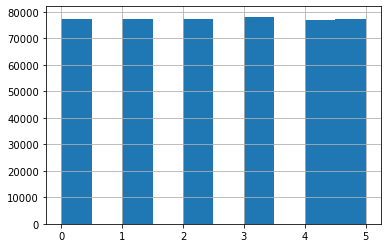

In [14]:
df['Pollutant.Name'].hist()

In [15]:
df.describe()

,Pollutant.Name,OR.Lightduty..includes.refueling..Conc,NR..no.airports..CMV..locomotives..Conc,OR.Lightduty..includes.refueling..Exposure.Conc,NR..no.airports..CMV..locomotives..Exposure.Conc,Total.Cancer.Risk..per.million.,Total.Reproductive.HI
count,464075.000000,464075.000000,464075.000000,464075.000000,464075.000000,464075.000000,464075.000000
mean,2.498990,0.253965,0.131919,0.255190,0.091499,1.877541,0.005033
std,1.706696,0.507871,0.243336,0.504851,0.148750,2.600946,0.015084
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.006777,0.004490,0.005833,0.004127,0.000000,0.000000
50%,3.000000,0.044963,0.044403,0.040458,0.035634,0.000000,0.000000
75%,4.000000,0.231520,0.174922,0.252261,0.125689,3.486106,0.000000
max,5.000000,14.485159,7.653379,13.672391,4.391887,54.085085,0.395298


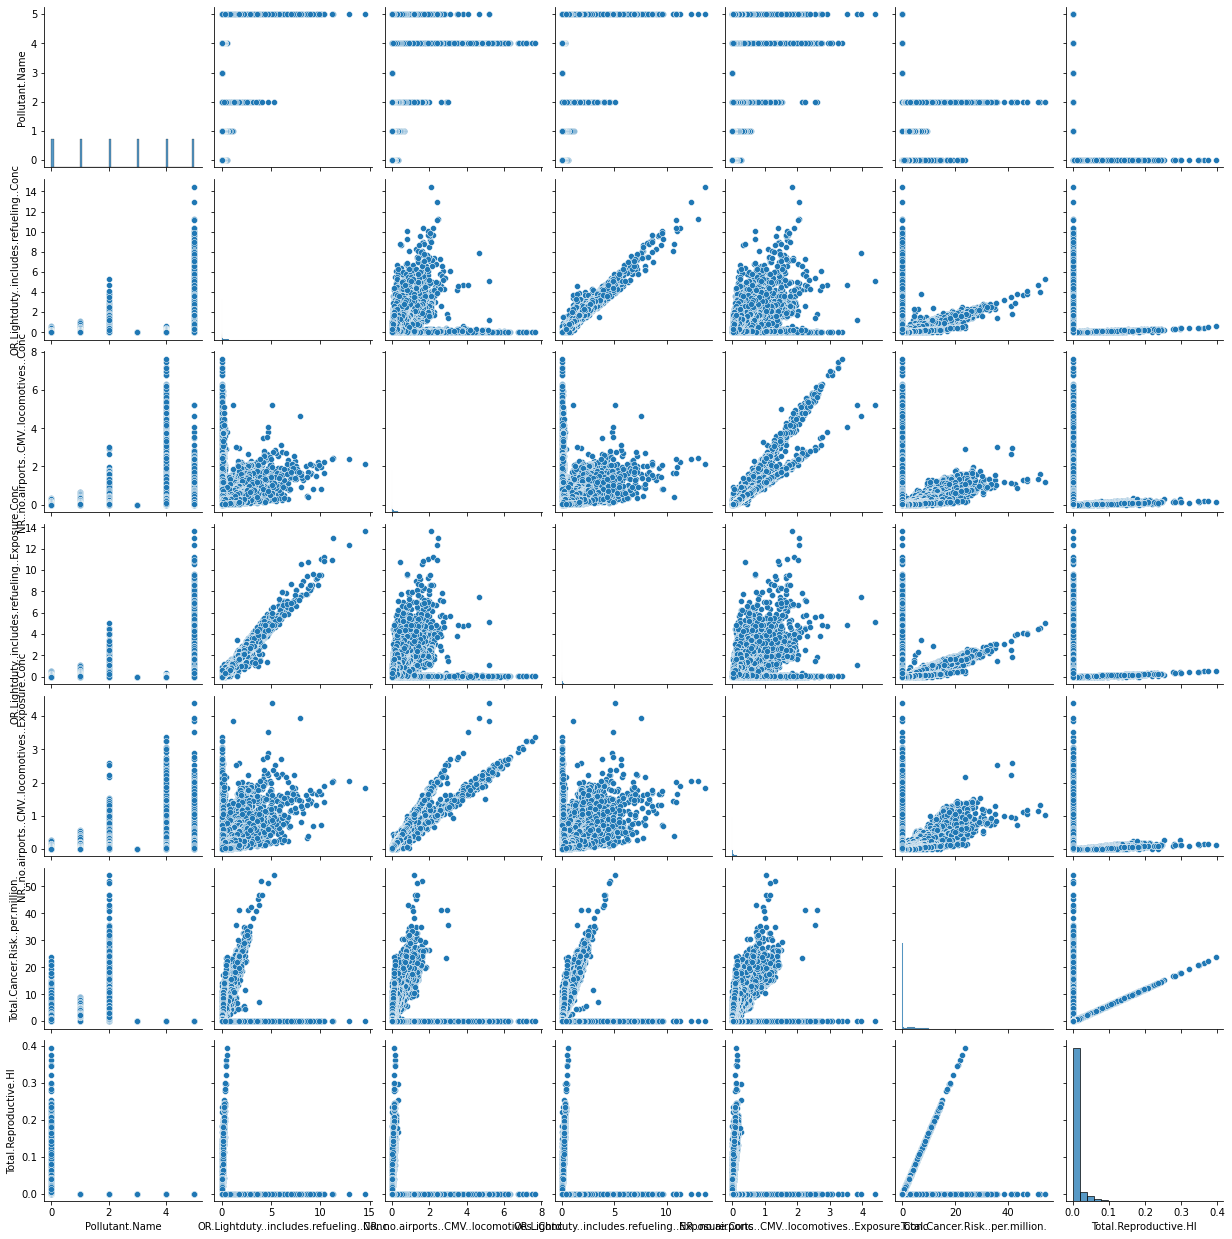

In [16]:
sns.pairplot(df)

In [17]:
df.columns

Index(['Pollutant.Name', 'OR.Lightduty..includes.refueling..Conc',
       'NR..no.airports..CMV..locomotives..Conc',
       'OR.Lightduty..includes.refueling..Exposure.Conc',
       'NR..no.airports..CMV..locomotives..Exposure.Conc',
       'Total.Cancer.Risk..per.million.', 'Total.Reproductive.HI'],
      dtype='object')

In [18]:
df = df.drop(['Pollutant.Name', 'Total.Reproductive.HI'], axis =1)

USING SCATTERPLOT FOR DIMENSIONALITY REDUCTION OF THE DATASET

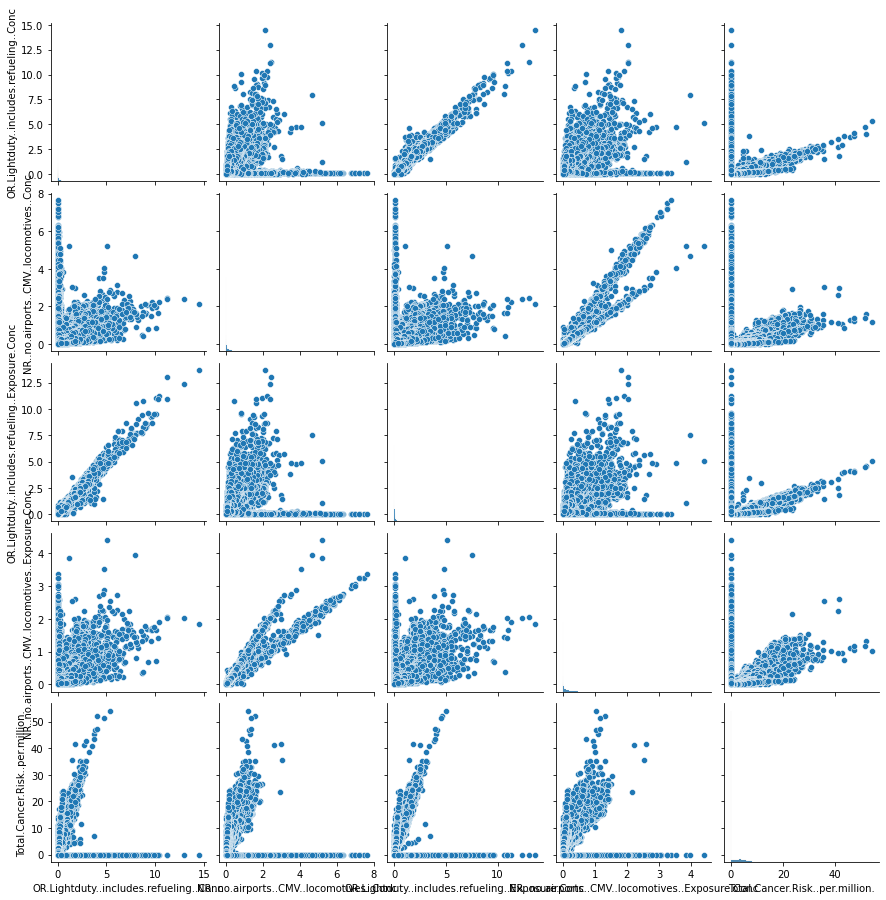

In [19]:
sns.pairplot(df)

USING PRINCIPAL COMPONENT ANALYSIS TO FIND THE LINEAR COMBINATION OF FEATURES

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit_transform(df)
pca.explained_variance_ratio_.cumsum()

array([0.91931704, 0.99132845, 0.99964323, 0.99987078, 1.        ])

<AxesSubplot:>

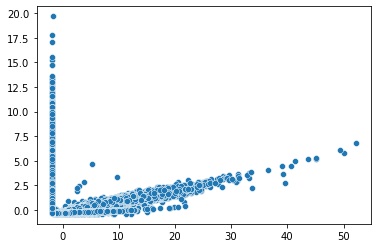

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(df)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

# KMEAN CLUSTERING ALGORITHM IMPLEMENTATION

In [22]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

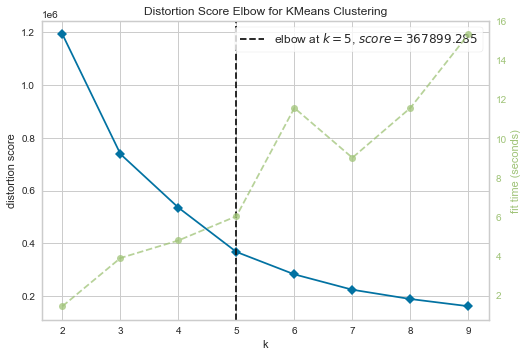

In [23]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, random_state=0) 
model = kmeans.fit(df)
labels = kmeans.labels_

Text(0.5, 1.0, 'With Clustering')

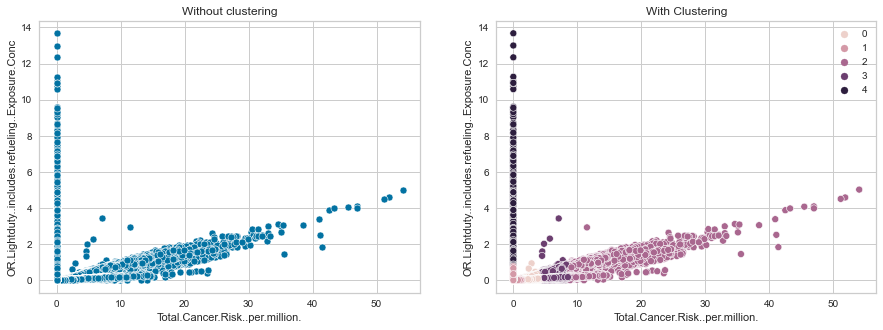

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize =(15,5))
sns.scatterplot(ax=axes[0], data = df, x='Total.Cancer.Risk..per.million.', y= 'OR.Lightduty..includes.refueling..Exposure.Conc').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data = df, x='Total.Cancer.Risk..per.million.', y= 'OR.Lightduty..includes.refueling..Exposure.Conc', hue = kmeans.labels_).set_title('With Clustering')

# BIRCH CLUSTERING ALGORITHM IMPLEMENTATION

In [26]:
from sklearn.cluster import Birch

In [27]:
birchmodel=Birch(n_clusters=5,threshold=0.5,branching_factor=100)
birch = birchmodel.fit(df)
labels = birchmodel.labels_

Text(0.5, 1.0, 'With Clustering')

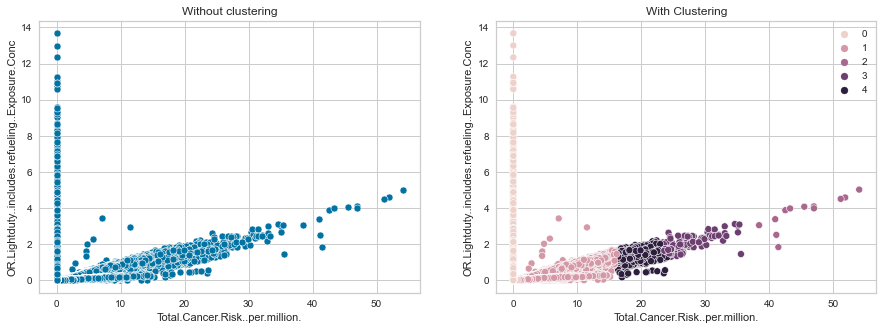

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize =(15,5))
sns.scatterplot(ax=axes[0], data = df, x='Total.Cancer.Risk..per.million.', y= 'OR.Lightduty..includes.refueling..Exposure.Conc').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data = df, x='Total.Cancer.Risk..per.million.', y= 'OR.Lightduty..includes.refueling..Exposure.Conc', hue = birchmodel.labels_).set_title('With Clustering')